In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [103]:
df=pd.read_csv('salary_prediction.csv')


In [104]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
#data analysis

In [ ]:
#nullvalues

In [105]:
df.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         Age  Attrition  BusinessTravel  DailyRate  Department  \
0     False      False           False      False       False   
1     False      False           False      False       False   
2     False      False           False      False       False   
3     False      False           False      False       False   
4     False      False           False      False       False   
...     ...        ...             ...        ...         ...   
1465  False      False           False      False       False   
1466  False      False           False      False       False   
1467  False      False           False      False       False   
1468  False      False           False      False       False   
1469  False      False           False      False       False   

      DistanceFromHome  Education  EducationField  EmployeeCount  \
0                False      False           False          False   
1                Fals

In [106]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [107]:
df.shape

(1470, 35)

In [108]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [109]:
[columns for columns in df.columns if df[columns].dtypes !='object']

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [110]:
num_col=[features for features in df.columns if df[features].dtypes !='object']
num_col

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [111]:
df[num_col].head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


In [112]:
df[num_col].nunique()

Age                           43
DailyRate                    886
DistanceFromHome              29
Education                      5
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobSatisfaction                4
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithCurrManager          18
dtype: int64

In [113]:
df['YearsWithCurrManager'].value_counts()

2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
14      5
15      5
16      2
Name: YearsWithCurrManager, dtype: int64

In [114]:
num_cols = list(df.select_dtypes(exclude = 'object').columns)
obj_cols = list(df.select_dtypes(exclude = np.number).columns)
num_cols
obj_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [115]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
#Univariate Analysis

G:\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


IndexError: index 9 is out of bounds for axis 0 with size 9

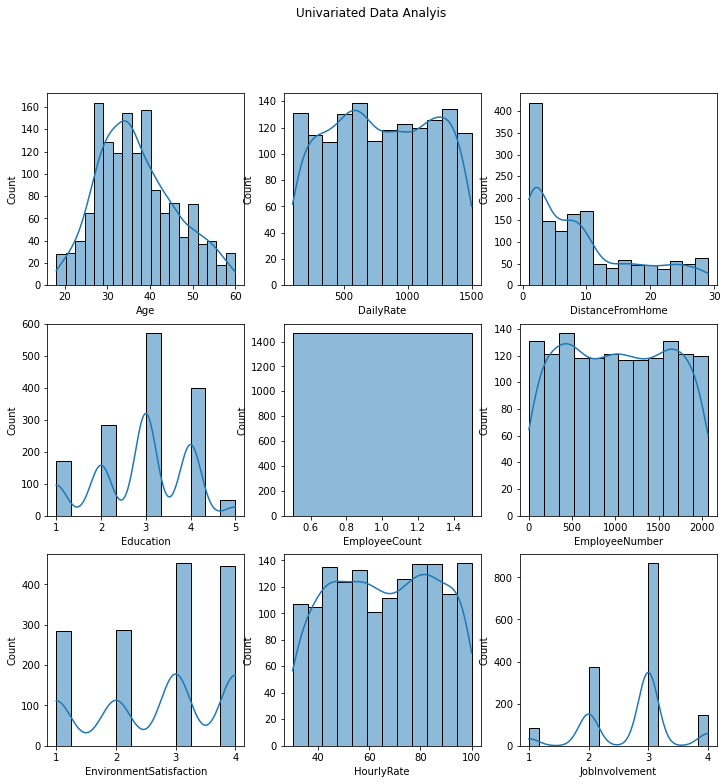

In [116]:
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(12,12))
plt.suptitle("Univariated Data Analyis")
ax=ax.flatten()
for x, i in enumerate(num_cols):
    sns.histplot(df[i], ax=ax[x], kde=True)
plt.tight_layout()
plt.show()

G:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

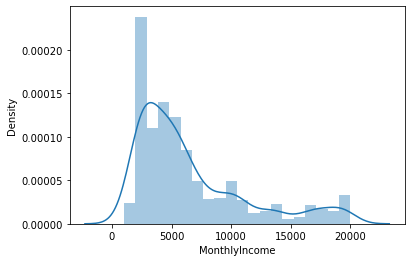

In [28]:
sns.distplot(train['MonthlyIncome'])

<AxesSubplot:xlabel='MonthlyIncome'>

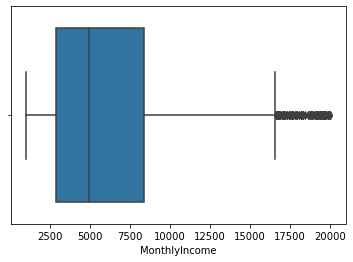

In [130]:
sns.boxplot(x=df['MonthlyIncome'])

G:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsAtCompany', ylabel='Density'>

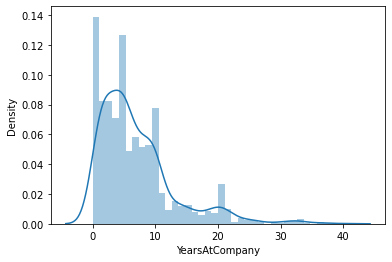

In [117]:
sns.distplot(df['YearsAtCompany'])

<AxesSubplot:xlabel='YearsAtCompany'>

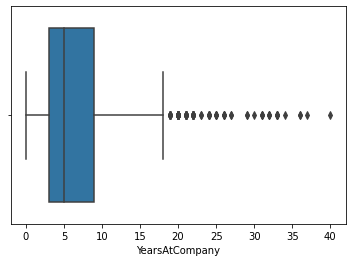

In [118]:
sns.boxplot(x=df['YearsAtCompany'])

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='count'>

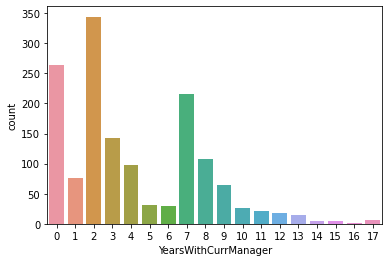

In [119]:
sns.countplot(x='YearsWithCurrManager',data=df)

<AxesSubplot:xlabel='MonthlyRate', ylabel='count'>

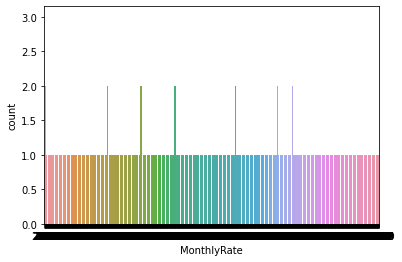

In [35]:
sns.countplot(x='MonthlyRate',data=df)

In [ ]:
#bivariate analysis

G:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='YearsSinceLastPromotion'>

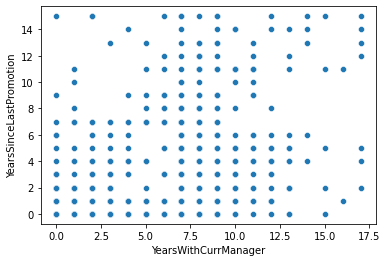

In [120]:
sns.scatterplot(df['YearsWithCurrManager'],df['YearsSinceLastPromotion'])

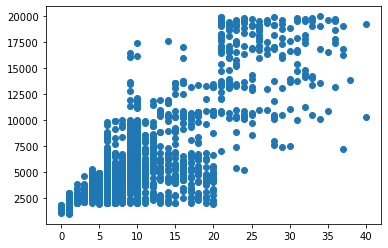

In [121]:
plt.scatter(df['TotalWorkingYears'],df['MonthlyIncome'])
plt.show()

In [122]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [123]:

df[['Age','EnvironmentSatisfaction']]

,Age,EnvironmentSatisfaction
0,41,2
1,49,3
2,37,4
3,33,4
4,27,1
...,...,...
1465,36,3
1466,39,4
1467,27,2
1468,49,4


In [124]:
pd.crosstab(df['MaritalStatus'],df['EnvironmentSatisfaction'])

EnvironmentSatisfaction,1,2,3,4
MaritalStatus,,,,
Divorced,64,58,99,106
Married,124,143,220,186
Single,96,86,134,154


<AxesSubplot:xlabel='MaritalStatus'>

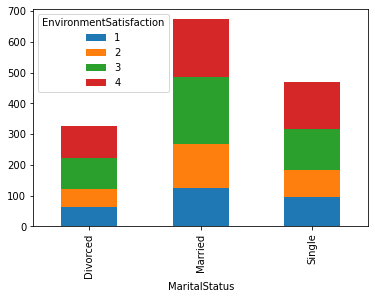

In [125]:
pd.crosstab(df['MaritalStatus'],df['EnvironmentSatisfaction']).plot(kind='bar',stacked='True')

In [126]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [131]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [133]:
df.drop(['DistanceFromHome','Education'],axis=1,inplace=True)

In [134]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,Life Sciences,1,1,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,Life Sciences,1,2,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,Other,1,4,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,Life Sciences,1,5,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,Medical,1,7,1,Male,...,4,80,1,6,3,3,2,2,2,2


In [137]:
x=df.drop(['EmployeeCount'],axis=1)
y=df['EmployeeCount']

In [140]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,Life Sciences,1,1,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,Life Sciences,1,2,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,Other,1,4,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,Life Sciences,1,5,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,Medical,1,7,1,Male,...,4,80,1,6,3,3,2,2,2,2


In [139]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1465    1
1466    1
1467    1
1468    1
1469    1
Name: EmployeeCount, Length: 1470, dtype: int64

In [141]:
x=pd.get_dummies(x,drop_first=True)

In [142]:
x.head()

,Age,DailyRate,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,94,3,2,4,5993,19479,...,0,0,0,0,0,1,0,0,1,1
1,49,279,2,3,61,2,2,2,5130,24907,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,4,4,92,2,1,3,2090,2396,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,5,4,56,3,1,3,2909,23159,...,0,0,0,0,1,0,0,1,0,1
4,27,591,7,1,40,3,1,2,3468,16632,...,1,0,0,0,0,0,0,1,0,0


In [143]:
x.drop(['JobRole_Manager'],axis=1,inplace=True)

In [144]:
x.head()

,Age,DailyRate,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,94,3,2,4,5993,19479,...,0,0,0,0,0,1,0,0,1,1
1,49,279,2,3,61,2,2,2,5130,24907,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,4,4,92,2,1,3,2090,2396,...,0,1,0,0,0,0,0,0,1,1
3,33,1392,5,4,56,3,1,3,2909,23159,...,0,0,0,0,1,0,0,1,0,1
4,27,591,7,1,40,3,1,2,3468,16632,...,0,1,0,0,0,0,0,1,0,0


In [145]:
x.drop(['JobRole_Human Resources'],axis=1,inplace=True)

In [146]:
x.head()

,Age,DailyRate,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,Gender_Male,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,94,3,2,4,5993,19479,...,0,0,0,0,0,1,0,0,1,1
1,49,279,2,3,61,2,2,2,5130,24907,...,1,0,0,0,1,0,0,1,0,0
2,37,1373,4,4,92,2,1,3,2090,2396,...,1,1,0,0,0,0,0,0,1,1
3,33,1392,5,4,56,3,1,3,2909,23159,...,0,0,0,0,1,0,0,1,0,1
4,27,591,7,1,40,3,1,2,3468,16632,...,1,1,0,0,0,0,0,1,0,0


In [147]:
x.drop(['JobRole_Manufacturing Director'],axis=1,inplace=True)

In [148]:
x.head()

,Age,DailyRate,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,EducationField_Technical Degree,Gender_Male,JobRole_Laboratory Technician,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,94,3,2,4,5993,19479,...,0,0,0,0,0,1,0,0,1,1
1,49,279,2,3,61,2,2,2,5130,24907,...,0,1,0,0,1,0,0,1,0,0
2,37,1373,4,4,92,2,1,3,2090,2396,...,0,1,1,0,0,0,0,0,1,1
3,33,1392,5,4,56,3,1,3,2909,23159,...,0,0,0,0,1,0,0,1,0,1
4,27,591,7,1,40,3,1,2,3468,16632,...,0,1,1,0,0,0,0,1,0,0


In [152]:
x.drop(['EducationField_Technical Degree','JobRole_Research Director','JobRole_Sales Representative'],axis=1,inplace=True)

In [153]:
x.head()

,Age,DailyRate,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,EducationField_Marketing,EducationField_Medical,EducationField_Other,Gender_Male,JobRole_Laboratory Technician,JobRole_Research Scientist,JobRole_Sales Executive,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,94,3,2,4,5993,19479,...,0,0,0,0,0,0,1,0,1,1
1,49,279,2,3,61,2,2,2,5130,24907,...,0,0,0,1,0,1,0,1,0,0
2,37,1373,4,4,92,2,1,3,2090,2396,...,0,0,1,1,1,0,0,0,1,1
3,33,1392,5,4,56,3,1,3,2909,23159,...,0,0,0,0,0,1,0,1,0,1
4,27,591,7,1,40,3,1,2,3468,16632,...,0,1,0,1,1,0,0,1,0,0


In [154]:
x.drop(['EducationField_Marketing'],axis=1,inplace=True)

In [155]:
x.head()

,Age,DailyRate,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,EducationField_Life Sciences,EducationField_Medical,EducationField_Other,Gender_Male,JobRole_Laboratory Technician,JobRole_Research Scientist,JobRole_Sales Executive,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,94,3,2,4,5993,19479,...,1,0,0,0,0,0,1,0,1,1
1,49,279,2,3,61,2,2,2,5130,24907,...,1,0,0,1,0,1,0,1,0,0
2,37,1373,4,4,92,2,1,3,2090,2396,...,0,0,1,1,1,0,0,0,1,1
3,33,1392,5,4,56,3,1,3,2909,23159,...,1,0,0,0,0,1,0,1,0,1
4,27,591,7,1,40,3,1,2,3468,16632,...,0,1,0,1,1,0,0,1,0,0


In [157]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['Age']=le.fit_transform(x['Age'])
x.head()

,Age,DailyRate,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,EducationField_Life Sciences,EducationField_Medical,EducationField_Other,Gender_Male,JobRole_Laboratory Technician,JobRole_Research Scientist,JobRole_Sales Executive,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,23,1102,1,2,94,3,2,4,5993,19479,...,1,0,0,0,0,0,1,0,1,1
1,31,279,2,3,61,2,2,2,5130,24907,...,1,0,0,1,0,1,0,1,0,0
2,19,1373,4,4,92,2,1,3,2090,2396,...,0,0,1,1,1,0,0,0,1,1
3,15,1392,5,4,56,3,1,3,2909,23159,...,1,0,0,0,0,1,0,1,0,1
4,9,591,7,1,40,3,1,2,3468,16632,...,0,1,0,1,1,0,0,1,0,0


In [163]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_df = scale.fit_transform(df[['HourlyRate']])
x['HourlyRate']=scaled_df
df

,Age,Attrition,BusinessTravel,DailyRate,Department,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,Yes,Travel_Rarely,1102,Sales,Life Sciences,1,1,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,31,No,Travel_Frequently,279,Research & Development,Life Sciences,1,2,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,19,Yes,Travel_Rarely,1373,Research & Development,Other,1,4,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,15,No,Travel_Frequently,1392,Research & Development,Life Sciences,1,5,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,9,No,Travel_Rarely,591,Research & Development,Medical,1,7,1,Male,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,No,Travel_Frequently,884,Research & Development,Medical,1,2061,3,Male,...,3,80,1,17,3,3,5,2,0,3
1466,21,No,Travel_Rarely,613,Research & Development,Medical,1,2062,4,Male,...,1,80,1,9,5,3,7,7,1,7
1467,9,No,Travel_Rarely,155,Research & Development,Life Sciences,1,2064,2,Male,...,2,80,1,6,0,3,6,2,0,3
1468,31,No,Travel_Frequently,1023,Sales,Medical,1,2065,4,Male,...,4,80,0,17,3,2,9,6,0,8
